In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, GlobalAveragePooling2D, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras.datasets import cifar10

# Loading the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Encoder layers
encoder_layers = [
    Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    GlobalAveragePooling2D()
]

# Decoder layers
decoder_layers = [
    Dense(128*8*8, activation='relu'),
    Reshape((8,8,128)),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(3, (3,3), padding='same', activation='sigmoid')
]

# Defining the input and output layers of the encoder and decoder
input_img = Input(shape=X_train.shape[1:])
encoded = input_img
for layer in encoder_layers:
  encoded = layer(encoded)

# Create the decoder model
decoded = encoded
for layer in decoder_layers:
    decoded = layer(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 9s 40ms/step - loss: 0.6185 - val_loss: 0.6748
Epoch 2/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5991 - val_loss: 0.6219
Epoch 3/50
196/196 [==============================] - 8s 38ms/step - loss: 0.5941 - val_loss: 0.5962
Epoch 4/50
196/196 [==============================] - 8s 39ms/step - loss: 0.5903 - val_loss: 0.5930
Epoch 5/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5881 - val_loss: 0.5940
Epoch 6/50
196/196 [==============================] - 8s 39ms/step - loss: 0.5865 - val_loss: 0.5903
Epoch 7/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5848 - val_loss: 0.5942
Epoch 8/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5834 - val_loss: 0.5905
Epoch 9/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5819 - val_loss: 0.5884
Epoch 10/50
196/196 [==============================] - 8s 38ms/step - loss: 0.5811 - val_lo

In [3]:
from matplotlib import pyplot as plt

313/313 [==============================] - 1s 3ms/step


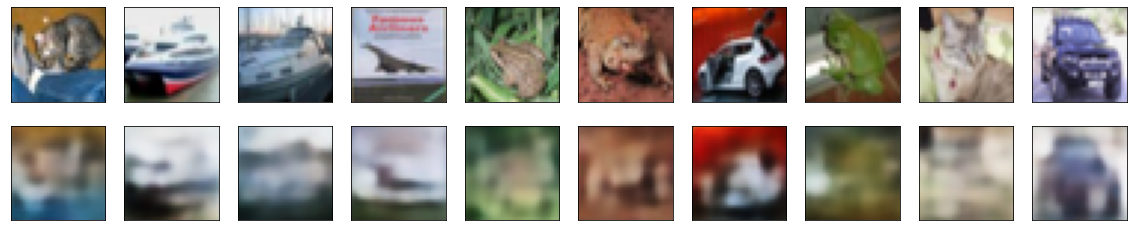

In [5]:
# Create the encoder model
encoder = Model(input_img, encoded)

# Generate encoded images
encoded_imgs = encoder.predict(X_test)

# Generate decoded images
decoded_imgs = autoencoder.predict(X_test)

# Compare the original and decoded images
n = 10  # number of images to be displayed
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()